In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [ ]:
import os
import shutil
import glob
import cv2
import random
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO
import urllib.request

In [ ]:
# # Load the vehicles training dataset
# !gdown 1pe4_HgXb9dctFGJXVNlyNcKSXZeht0lX
# !unzip car_img-test.zip -d car_train

In [ ]:
# # Load the vehicles validation dataset
# !gdown 1hwz6X-Zp7JpJL35K6P3z7k6O_PTXhUcT
# !unzip car_img-validation.zip -d car_validation

In [ ]:
# # Load the license plates training dataset
# !gdown 1PBbW1I7Itdf83bH_p60vo3_jrGTS0yLM
# !unzip plate_image_with_dummy-train.zip -d plate_train

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Q2/car_img-test.zip' -d car_train
!unzip '/content/drive/MyDrive/Colab Notebooks/Q2/car_img-validation.zip' -d car_validation
!unzip '/content/drive/MyDrive/Colab Notebooks/Q2/plate_image_with_dummy-train.zip' -d plate_train

Streaming output truncated to the last 5000 lines.
  inflating: plate_train/train/dummy_te_14501.jpg  
  inflating: plate_train/train/dummy_te_14501.xml  
  inflating: plate_train/train/dummy_te_14502.jpg  
  inflating: plate_train/train/dummy_te_14502.xml  
  inflating: plate_train/train/dummy_te_14503.jpg  
  inflating: plate_train/train/dummy_te_14503.xml  
  inflating: plate_train/train/dummy_te_14504.jpg  
  inflating: plate_train/train/dummy_te_14504.xml  
  inflating: plate_train/train/dummy_te_14505.jpg  
  inflating: plate_train/train/dummy_te_14505.xml  
  inflating: plate_train/train/dummy_te_14506.jpg  
  inflating: plate_train/train/dummy_te_14506.xml  
  inflating: plate_train/train/dummy_te_14507.jpg  
  inflating: plate_train/train/dummy_te_14507.xml  
  inflating: plate_train/train/dummy_te_14508.jpg  
  inflating: plate_train/train/dummy_te_14508.xml  
  inflating: plate_train/train/dummy_te_14509.jpg  
  inflating: plate_train/train/dummy_te_14509.xml  
  inflating: 

In [ ]:
def folder_organizer(folder_path):
    # Define target directory
    images_dir = os.path.join(folder_path, "images")
    labels_dir = os.path.join(folder_path, "labels")

    # Create folders if don't exist
    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)

    for file_name in os.listdir(folder_path):
        if file_name in ("images", "labels"):
            continue

        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            lower_name = file_name.lower()
            if lower_name.endswith(('.jpg')):
                try:
                    shutil.move(file_path, os.path.join(images_dir, file_name))
                except Exception as e:
                    print(f"Image transfer error {file_name}: {e}")
            elif lower_name.endswith('.xml'):
                try:
                    shutil.move(file_path, os.path.join(labels_dir, file_name))
                except Exception as e:
                    print(f"XML transfer error {file_name}: {e}")

    print(f'✅ The organization successfully done at "{folder_path}".')


folder_organizer('/content/car_train/test')
folder_organizer('/content/car_validation/validation')
folder_organizer('/content/plate_train/train')

✅ The organization successfully done at "/content/car_train/test".
✅ The organization successfully done at "/content/car_validation/validation".
✅ The organization successfully done at "/content/plate_train/train".


In [ ]:
# Check the number of files
def count_files(folder):
    print(f"📂 {folder}:")
    print(" images:", len(os.listdir(os.path.join(folder, "images"))))
    print(" labels:", len(os.listdir(os.path.join(folder, "labels"))))

count_files('/content/car_train/test')
count_files('/content/car_validation/validation')
count_files('/content/plate_train/train')

📂 /content/car_train/test:
 images: 4176
 labels: 4176
📂 /content/car_validation/validation:
 images: 2120
 labels: 2120
📂 /content/plate_train/train:
 images: 45469
 labels: 45469


In [ ]:
# Create the classes of license plates
classes = {'کل ناحیه پلاک': 0}

def update_classes(folder_path):
    global classes
    labels_dir = os.path.join(folder_path, "labels")

    for xml_file in os.listdir(labels_dir):
        xml_path = os.path.join(labels_dir, xml_file)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()

            for obj in root.findall('.//object'):
                name = obj.find('name').text
                if name not in classes:
                    new_id = len(classes)
                    classes[name] = new_id
        except ET.ParseError as e:
            print(f"Error parsing {xml_file}: {e}")
            continue

# From all datasets
datasets = [
    '/content/car_train/test',
    '/content/car_validation/validation',
    '/content/plate_train/train'
]

for dataset in datasets:
    update_classes(dataset)

print("\nFinal class mapping:")
for class_name, class_id in sorted(classes.items(), key=lambda x: x[1]):
    print(f"Class: {class_name}, ID: {class_id}")


Final class mapping:
Class: کل ناحیه پلاک, ID: 0
Class: 1, ID: 1
Class: 9, ID: 2
Class: ه‍, ID: 3
Class: 6, ID: 4
Class: 3, ID: 5
Class: 8, ID: 6
Class: 5, ID: 7
Class: 4, ID: 8
Class: ج, ID: 9
Class: د, ID: 10
Class: 7, ID: 11
Class: ط, ID: 12
Class: 2, ID: 13
Class: ل, ID: 14
Class: م, ID: 15
Class: ق, ID: 16
Class: و, ID: 17
Class: ی, ID: 18
Class: ن, ID: 19
Class: ص, ID: 20
Class: س, ID: 21
Class: ب, ID: 22
Class: 0, ID: 23
Class: ت, ID: 24
Class: ع, ID: 25
Class: ژ (معلولین و جانبازان), ID: 26
Class: الف, ID: 27
Class: ث, ID: 28
Class: پ, ID: 29
Class: ظ, ID: 30
Class: گ, ID: 31
Class: S, ID: 32
Class: ش, ID: 33
Class: تشریفات, ID: 34
Class: ه, ID: 35
Class: ک, ID: 36
Class: D, ID: 37
Class: ز, ID: 38
Class: ف, ID: 39


In [ ]:
# The process for converting labels to the acceptable of YOLO format
def convert_xml_to_txt(folder_path):
    labels_dir = os.path.join(folder_path, "labels")
    images_dir = os.path.join(folder_path, "images")

    for xml_file in os.listdir(labels_dir):
        if not xml_file.endswith('.xml'):
            continue

        xml_path = os.path.join(labels_dir, xml_file)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()

            img_file = xml_file.replace('.xml', '.jpg')
            img_path = os.path.join(images_dir, img_file)
            img = cv2.imread(img_path)
            img_height, img_width = img.shape[:2]
            txt_lines = []

            for obj in root.findall('.//object'):
                name = obj.find('name').text
                bbox = obj.find('bndbox')
                xmin = float(bbox.find('xmin').text)
                ymin = float(bbox.find('ymin').text)
                xmax = float(bbox.find('xmax').text)
                ymax = float(bbox.find('ymax').text)

                # Normalization process
                x_center = ((xmin + xmax) / 2) / img_width
                y_center = ((ymin + ymax) / 2) / img_height
                width = (xmax - xmin) / img_width
                height = (ymax - ymin) / img_height

                class_id = classes[name]
                txt_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

            # Saving
            txt_path = os.path.join(labels_dir, xml_file.replace('.xml', '.txt'))
            with open(txt_path, 'w', encoding='utf-8') as f:
                f.write('\n'.join(txt_lines))

            # Delete XML files
            os.remove(xml_path)
        except Exception as e:
            print(f"Error processing {xml_file}: {e}")
            continue

    print(f'✅ Converting process on "{folder_path}" dataset successfully done.')


# Convert all XML files to TXT
for dataset in datasets:
    convert_xml_to_txt(dataset)

✅ Converting process on "/content/car_train/test" dataset successfully done.
✅ Converting process on "/content/car_validation/validation" dataset successfully done.
✅ Converting process on "/content/plate_train/train" dataset successfully done.


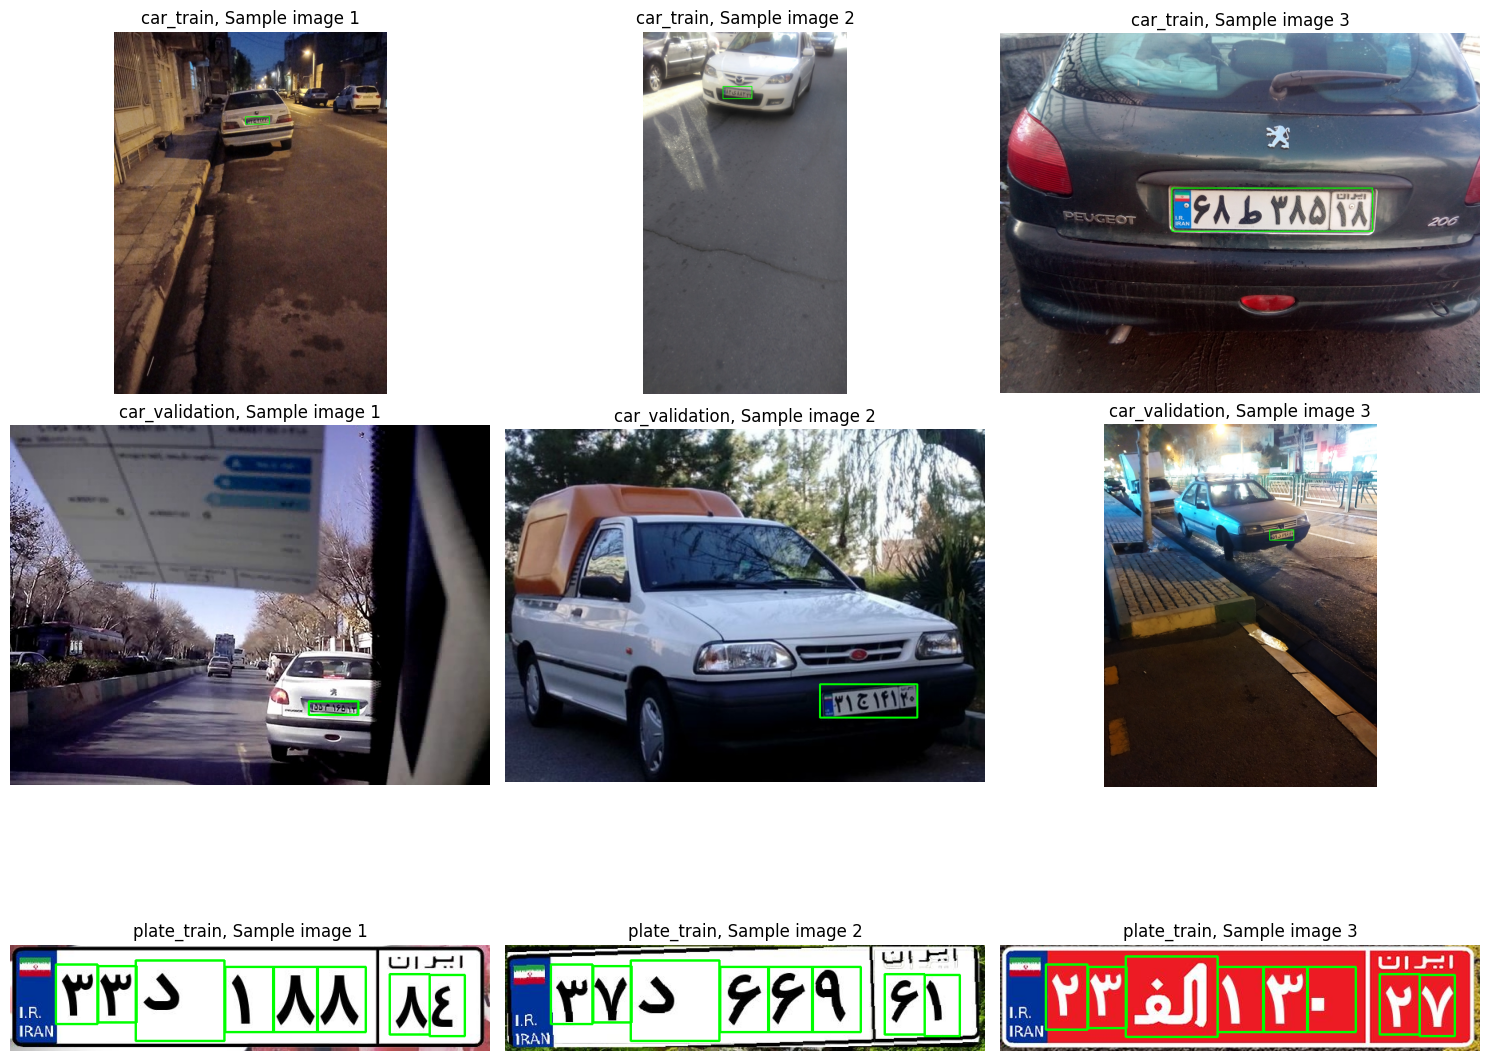

In [ ]:
# Randomly select and examine samples from all datasets
def visualize_datasets(dataset_paths):
    plt.figure(figsize=(15, 12))
    for dataset_idx, dataset_path in enumerate(dataset_paths):
        images_dir = os.path.join(dataset_path, 'images')
        labels_dir = os.path.join(dataset_path, 'labels')
        folder_name = os.path.basename(os.path.dirname(dataset_path))       # Get folder name from path

        # Selecting random image to display
        image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg'))]
        if len(image_files) >= 3:
            selected_images = random.sample(image_files, 3)

            for img_idx, img_file in enumerate(selected_images):
                img_path = os.path.join(images_dir, img_file)
                img = cv2.imread(img_path)
                img_height, img_width = img.shape[:2]
                label_file = os.path.splitext(img_file)[0] + '.txt'
                label_path = os.path.join(labels_dir, label_file)

                if os.path.exists(label_path):
                    with open(label_path, 'r') as f:
                        for line in f.readlines():
                            class_id, x_center, y_center, width, height = map(float, line.strip().split())

                            # Skip based on folder and class
                            if dataset_path in ['/content/car_train/test', '/content/car_validation/validation']:
                                if class_id != 0:  # Only show class 0
                                    continue
                            elif dataset_path == '/content/plate_train/train':
                                if class_id == 0:  # Skip class 0
                                    continue

                            # Coordinates to pixels
                            x_center_px = int(x_center * img_width)
                            y_center_px = int(y_center * img_height)
                            width_px = int(width * img_width)
                            height_px = int(height * img_height)

                            # Coordinates
                            x1 = int(x_center_px - width_px/2)
                            y1 = int(y_center_px - height_px/2)
                            x2 = int(x_center_px + width_px/2)
                            y2 = int(y_center_px + height_px/2)

                            # Drawing boundry box
                            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.subplot(3, 3, dataset_idx * 3 + img_idx + 1)

                plt.imshow(img_rgb)
                plt.title(f'{folder_name}, Sample image {img_idx + 1}')
                plt.axis('off')

    plt.tight_layout()
    plt.show()


visualize_datasets(datasets)

In [ ]:
# Creating data.yaml file
data_yaml = f"""train: /content/car_train/test
val: /content/car_validation/validation

nc: {len(classes)}
names: {list(classes.keys())}"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml)

print('✅ The "data.yaml" file has been created successfully')

✅ The "data.yaml" file has been created successfully


In [ ]:
# Download the YOLOv12 weights
weights_dir = os.path.join(os.getcwd(), "weights")
os.makedirs(weights_dir, exist_ok=True)

urls = [
    "https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo12n.pt"
]

for url in urls:
    file_name = os.path.join(weights_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, file_name)
    print(f"✅ Downloaded successfully {file_name}")

✅ Downloaded successfully /content/weights/yolo12n.pt


In [ ]:
# Define YOLOv12 model process
models = {
    'nano': '/content/weights/yolo12n.pt'
}

# Base training parameters
base_params = {
    'data': '/content/data.yaml',
    'project': '/content/drive/MyDrive/Colab Notebooks',    # Saving directory
    'name': 'ANPR_model',
    'save_period': 10,
    'classes': [0],     # Detect only first class
    'epochs': 50,
    'imgsz': 640,
    'batch': 64,
    'patience': 10,
    'device': 0,
    'pretrained': True,
    'seed': 0,
    'optimizer': 'AdamW',
    'verbose': True,
    'save': True,
    'plots': True,
    'amp': True,
    # Augmentation
    'hsv_h': 0.015,
    'hsv_s': 0.7,
    'hsv_v': 0.4,
    'translate': 0.1,
    'scale': 0.7,
    'fliplr': 0.5,
    'mosaic': 0.5,
    'mixup': 0.1,
    # Regularization
    'cos_lr': True,
    'lr0': 0.001,
    'lrf': 0.01,
    'weight_decay': 0.001  # L2
}

# Dictionary to store results
model_results = {}

# Train and evaluate each model
for model_name, model_path in models.items():
    print(f"\n🔃 Training {model_name} model...")

    # Initialize model
    model = YOLO(model_path)

    # Train model
    results = model.train(**base_params)

    # Evaluate model
    val_results = model.val()

    # Store results
    model_results[model_name] = {
        'mAP': val_results.box.map,
        'mAP50': val_results.box.map50,
        'mAP75': val_results.box.map75,
        'recall': val_results.box.r,
        'precision': val_results.box.p
    }

    # Save model
    model.save(f'best_model_{model_name}.pt')


🔃 Training nano model...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolo12n.pt, data=/content/data.yaml, epochs=50, time=None, patience=10, batch=64, imgsz=640, save=True, save_period=10, cache=False, device=0, workers=8, project=/content/drive/MyDrive/Colab Notebooks, name=ANPR_model7, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=[0], retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

100%|██████████| 22.2M/22.2M [00:00<00:00, 40.5MB/s]


Overriding model.yaml nc=80 with nc=40

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 288MB/s]


AMP: checks passed ✅


train: Scanning /content/car_train/test/labels... 4176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4176/4176 [00:04<00:00, 991.45it/s] 


train: New cache created: /content/car_train/test/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/car_validation/validation/labels... 2120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2120/2120 [00:01<00:00, 1167.26it/s]


val: New cache created: /content/car_validation/validation/labels.cache
Plotting labels to /content/drive/MyDrive/Colab Notebooks/ANPR_model7/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.001), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Colab Notebooks/ANPR_model7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      12.4G      2.348      7.587      2.107        104        640:   3%|▎         | 2/66 [00:03<01:44,  1.63s/it]

       1/50      13.1G      2.305      7.394      2.023        119        640:   6%|▌         | 4/66 [00:06<01:33,  1.51s/it]
100%|██████████| 755k/755k [00:00<00:00, 88.0MB/s]
       1/50      13.1G      1.413      2.556      1.188         33        640: 100%|██████████| 66/66 [02:24<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.35s/it]

                   all       2120       2494      0.865      0.392      0.645      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.3G      1.168     0.8467      1.003         21        640: 100%|██████████| 66/66 [02:27<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:42<00:00,  2.50s/it]

                   all       2120       2494       0.48       0.55      0.433      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      12.3G      1.178     0.8306       1.02         37        640: 100%|██████████| 66/66 [02:25<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.41s/it]


                   all       2120       2494      0.925      0.849        0.9      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.3G       1.15     0.7758      1.016         21        640: 100%|██████████| 66/66 [02:29<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.37s/it]

                   all       2120       2494      0.886      0.823      0.881      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.3G       1.12       0.74      1.009         30        640: 100%|██████████| 66/66 [02:25<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.27s/it]

                   all       2120       2494      0.877      0.782      0.862      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      12.3G      1.091     0.7107     0.9973         27        640: 100%|██████████| 66/66 [02:27<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.35s/it]

                   all       2120       2494       0.88      0.855      0.903       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      12.3G      1.063     0.6735     0.9867         32        640: 100%|██████████| 66/66 [02:29<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.38s/it]

                   all       2120       2494      0.918      0.868       0.92      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.3G      1.059      0.655     0.9896         30        640: 100%|██████████| 66/66 [02:24<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.29s/it]

                   all       2120       2494      0.929      0.891      0.929      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      12.3G      1.042     0.6513     0.9839         36        640: 100%|██████████| 66/66 [02:20<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.34s/it]

                   all       2120       2494      0.903      0.876      0.923      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.3G      1.014     0.6249     0.9713         28        640: 100%|██████████| 66/66 [02:30<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.35s/it]

                   all       2120       2494      0.916      0.858      0.915      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      12.3G       1.02     0.6238     0.9716         17        640: 100%|██████████| 66/66 [02:28<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.28s/it]

                   all       2120       2494      0.934      0.887      0.933      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.3G      1.001     0.6136     0.9635         27        640: 100%|██████████| 66/66 [02:24<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.35s/it]

                   all       2120       2494      0.925      0.894      0.939      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.3G      1.004     0.6073     0.9648         22        640: 100%|██████████| 66/66 [02:24<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:41<00:00,  2.41s/it]

                   all       2120       2494      0.926      0.892      0.931       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      12.3G      0.982     0.5854     0.9633         26        640: 100%|██████████| 66/66 [02:25<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.33s/it]

                   all       2120       2494      0.923      0.911      0.946      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      12.3G     0.9965     0.5877     0.9699         30        640: 100%|██████████| 66/66 [02:24<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.34s/it]

                   all       2120       2494      0.927      0.919      0.949      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.3G      0.971     0.5748     0.9589         28        640: 100%|██████████| 66/66 [02:24<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.25s/it]

                   all       2120       2494      0.918      0.896      0.941      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      12.3G     0.9452     0.5599     0.9485         23        640: 100%|██████████| 66/66 [02:27<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.28s/it]

                   all       2120       2494      0.933      0.897      0.944      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      12.3G     0.9565     0.5587     0.9508         27        640: 100%|██████████| 66/66 [02:21<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:37<00:00,  2.18s/it]

                   all       2120       2494      0.928      0.889      0.941      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      12.3G     0.9483     0.5523     0.9429         35        640: 100%|██████████| 66/66 [02:25<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.33s/it]

                   all       2120       2494      0.923      0.894      0.935      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.4G     0.9508     0.5457     0.9484         32        640: 100%|██████████| 66/66 [02:32<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.26s/it]

                   all       2120       2494       0.93      0.906      0.948      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.3G     0.9389     0.5391      0.941         27        640: 100%|██████████| 66/66 [02:29<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.40s/it]

                   all       2120       2494      0.919      0.898      0.942      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.3G     0.9323     0.5362     0.9476         18        640: 100%|██████████| 66/66 [02:26<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.29s/it]

                   all       2120       2494       0.93      0.903      0.947        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.3G     0.9246     0.5334     0.9448         34        640: 100%|██████████| 66/66 [02:24<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.26s/it]

                   all       2120       2494      0.923      0.907       0.95      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.3G     0.9045     0.5139     0.9355         36        640: 100%|██████████| 66/66 [02:26<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.40s/it]

                   all       2120       2494      0.929      0.887      0.939      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.4G     0.8986     0.5143     0.9391         21        640: 100%|██████████| 66/66 [02:24<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:35<00:00,  2.10s/it]

                   all       2120       2494      0.933      0.902      0.949      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.4G     0.9086      0.512     0.9279         34        640: 100%|██████████| 66/66 [02:21<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:36<00:00,  2.17s/it]

                   all       2120       2494      0.934      0.909      0.956      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      12.3G     0.8948     0.4995     0.9347         36        640: 100%|██████████| 66/66 [02:29<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:37<00:00,  2.20s/it]

                   all       2120       2494       0.94      0.903      0.954      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.3G     0.8756     0.4988     0.9238         36        640: 100%|██████████| 66/66 [02:26<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:37<00:00,  2.19s/it]

                   all       2120       2494      0.939      0.913      0.959      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.3G     0.8757       0.49     0.9217         29        640: 100%|██████████| 66/66 [02:24<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:41<00:00,  2.43s/it]

                   all       2120       2494      0.939      0.899      0.954      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.3G     0.8751     0.4879     0.9215         35        640: 100%|██████████| 66/66 [02:30<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.35s/it]

                   all       2120       2494      0.927      0.909      0.952      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      12.3G     0.8646     0.4777      0.924         28        640: 100%|██████████| 66/66 [02:26<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.27s/it]

                   all       2120       2494      0.924      0.908      0.955      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.3G     0.8753     0.4824     0.9261         31        640: 100%|██████████| 66/66 [02:33<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:36<00:00,  2.12s/it]

                   all       2120       2494      0.926      0.923      0.962      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      12.3G     0.8477     0.4651     0.9184         39        640: 100%|██████████| 66/66 [02:24<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:36<00:00,  2.14s/it]

                   all       2120       2494      0.924      0.923      0.962      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.3G     0.8618     0.4772     0.9222         26        640: 100%|██████████| 66/66 [02:32<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:37<00:00,  2.24s/it]

                   all       2120       2494      0.931      0.909       0.96      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      12.3G     0.8482     0.4709     0.9207         34        640: 100%|██████████| 66/66 [02:28<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.31s/it]

                   all       2120       2494      0.931      0.914      0.961      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.3G     0.8389     0.4562     0.9134         33        640: 100%|██████████| 66/66 [02:28<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.24s/it]

                   all       2120       2494      0.928      0.916      0.963      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      12.3G     0.8383     0.4588     0.9181         28        640: 100%|██████████| 66/66 [02:23<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.27s/it]

                   all       2120       2494      0.928       0.92      0.964      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.3G     0.8265     0.4494      0.916         24        640: 100%|██████████| 66/66 [02:29<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:36<00:00,  2.16s/it]

                   all       2120       2494      0.929      0.924      0.965      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      12.3G     0.8232     0.4435     0.9112         25        640: 100%|██████████| 66/66 [02:10<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:35<00:00,  2.08s/it]

                   all       2120       2494      0.933      0.915      0.962      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.3G     0.8089     0.4294     0.9082         18        640: 100%|██████████| 66/66 [02:26<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.37s/it]

                   all       2120       2494      0.928      0.928      0.966      0.753


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      12.3G     0.7645      0.401     0.9008         17        640: 100%|██████████| 66/66 [02:08<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.34s/it]

                   all       2120       2494      0.938      0.927      0.966      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.3G     0.7578     0.3879     0.8976         22        640: 100%|██████████| 66/66 [02:03<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.27s/it]

                   all       2120       2494      0.931      0.928      0.966       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.3G     0.7576     0.3921     0.9016         16        640: 100%|██████████| 66/66 [02:02<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.24s/it]

                   all       2120       2494      0.932      0.928      0.967      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.3G     0.7528      0.387      0.897         18        640: 100%|██████████| 66/66 [02:04<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.30s/it]

                   all       2120       2494      0.928       0.93      0.965      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      12.3G     0.7412     0.3766     0.8956         19        640: 100%|██████████| 66/66 [02:01<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:36<00:00,  2.16s/it]

                   all       2120       2494      0.927      0.936      0.968      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.3G     0.7406     0.3798     0.8968         18        640: 100%|██████████| 66/66 [02:03<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.30s/it]

                   all       2120       2494      0.935      0.926      0.968      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      12.3G     0.7393     0.3776     0.8942         21        640: 100%|██████████| 66/66 [02:00<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.37s/it]

                   all       2120       2494      0.932      0.931      0.967       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      12.3G     0.7443     0.3731     0.8976         18        640: 100%|██████████| 66/66 [02:03<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:36<00:00,  2.15s/it]

                   all       2120       2494      0.933      0.933      0.968      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      12.3G     0.7457     0.3717     0.8934         20        640: 100%|██████████| 66/66 [01:59<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.27s/it]

                   all       2120       2494      0.936      0.931      0.969      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      12.3G      0.738     0.3708     0.8899         18        640: 100%|██████████| 66/66 [02:01<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.34s/it]

                   all       2120       2494      0.937       0.93      0.969      0.765



50 epochs completed in 2.540 hours.
Optimizer stripped from /content/drive/MyDrive/Colab Notebooks/ANPR_model7/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/Colab Notebooks/ANPR_model7/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/Colab Notebooks/ANPR_model7/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,564,528 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.34s/it]


                   all       2120       2494      0.937       0.93      0.969      0.766
         کل ناحیه پلاک       2120       2494      0.937       0.93      0.969      0.766
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/drive/MyDrive/Colab Notebooks/ANPR_model7
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,564,528 parameters, 0 gradients, 6.4 GFLOPs


val: Scanning /content/car_validation/validation/labels.cache... 2120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2120/2120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:43<00:00,  1.28s/it]


                   all       2120       2494      0.937       0.93      0.969      0.764
         کل ناحیه پلاک       2120       2494      0.937       0.93      0.969      0.764
Speed: 0.8ms preprocess, 4.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/drive/MyDrive/Colab Notebooks/ANPR_model72
